In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# Plotting:
# 1. Series.plot.FUNCTION
# 2. DataFrame.plot.FUNCTION
#
# FUNCTIONS: pie, scatter, line, bar

In [3]:
s = Series([50, 30, 20])
s

0    50
1    30
2    20
dtype: int64

In [4]:
%matplotlib inline

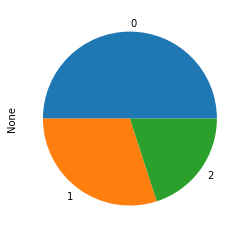

In [5]:
s.plot.pie()

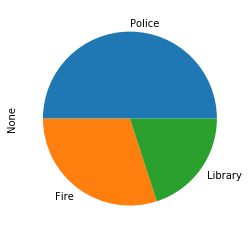

In [6]:
s = Series([50, 30, 20], index=["Police", "Fire", "Library"])
s.plot.pie()

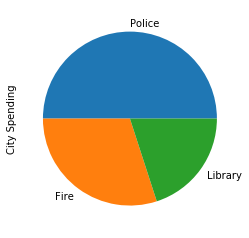

In [8]:
# TODO: do as bar plot instead with absolute amounts
s = Series([50, 30, 20], index=["Police", "Fire", "Library"],
            name="City Spending")
s.plot.pie()

In [11]:
import matplotlib
matplotlib.rcParams["font.size"] = 16

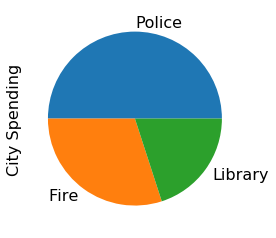

In [12]:
s = Series([50, 30, 20], index=["Police", "Fire", "Library"],
            name="City Spending")
s.plot.pie()

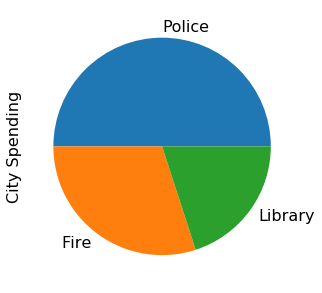

In [13]:
s = Series([50, 30, 20], index=["Police", "Fire", "Library"],
            name="City Spending")
s.plot.pie(figsize=(5, 5))

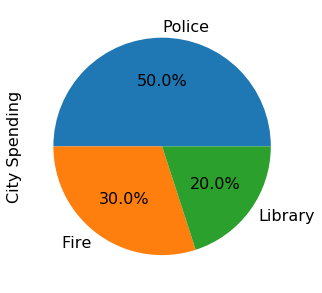

In [25]:
s = Series([50, 30, 20], index=["Police", "Fire", "Library"],
            name="City Spending")
s.plot.pie(figsize=(5, 5), autopct="%.1f%%")

In [ ]:
3 + 5 # this is addition
"A" + "B" # this is concatenation

In [14]:
# "format-string" % VALUE # this is formatting
# 5 % 3                   # this is modulo

In [15]:
"%d" % 3.14

'3'

In [17]:
"%f" % 3.14

'3.140000'

In [20]:
"$%.1f" % 3.14

'$3.1'

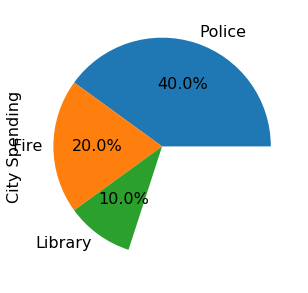

In [26]:
s = Series([0.4, 0.2, 0.1], index=["Police", "Fire", "Library"],
            name="City Spending")
s.plot.pie(figsize=(5, 5), autopct="%.1f%%")

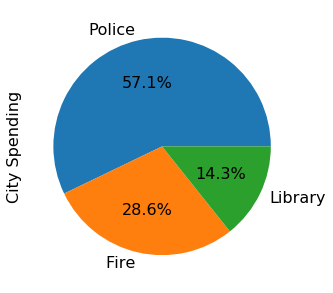

In [29]:
s = Series([0.04, 0.02, 0.01], index=["Police", "Fire", "Library"],
            name="City Spending")
(s / s.sum()).plot.pie(figsize=(5, 5), autopct="%.1f%%")

In [ ]:
# 2, 80, 6, 10

In [30]:
import sqlite3
conn = sqlite3.connect("bus.db")
conn

In [31]:
pd.read_sql("SELECT * FROM sqlite_master", conn)

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,index,ix_boarding_index,boarding,3,"CREATE INDEX ""ix_boarding_index""ON ""boarding"" ..."
2,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."
3,index,ix_routes_index,routes,57,"CREATE INDEX ""ix_routes_index""ON ""routes"" (""in..."


In [33]:
pd.read_sql("SELECT * FROM boarding", conn).head()

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34
3,3,1164,6,43.106465,-89.340021,10.59
4,4,1167,3,43.077867,-89.369993,3.11


In [38]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS people
FROM boarding
GROUP BY Route
ORDER BY people DESC
""", conn)
df.head(8)

,Route,people
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55
5,4,2656.99
6,15,2179.98
7,38,1955.85


In [42]:
df = df.set_index("Route")
df.head()

,people
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


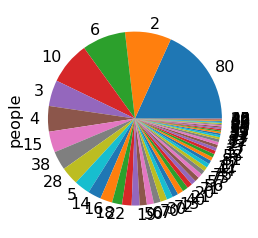

In [44]:
riders = df["people"]
riders.plot.pie()

In [46]:
riders[6]

4537.019999999993

In [48]:
riders[:6]

Route
80    10211.79
2      4808.03
6      4537.02
10     4425.23
3      2708.55
4      2656.99
Name: people, dtype: float64

In [49]:
top5 = riders[:5]
top5

Route
80    10211.79
2      4808.03
6      4537.02
10     4425.23
3      2708.55
Name: people, dtype: float64

In [51]:
top5["other"] = riders[5:].sum()
top5

Route
80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
other    29296.56
Name: people, dtype: float64

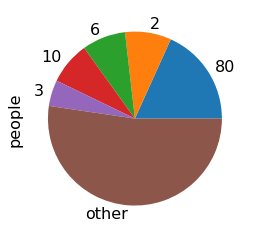

In [52]:
top5.plot.pie()

In [53]:
# SCATTER
# DataFrame.plot.scatter(x="col name 1", y="col name 2")

In [55]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
trees = pd.DataFrame(trees)
trees.head()

,age,diameter,height
0,1,0.8,1.5
1,1,1.2,1.9
2,1,1.4,1.8
3,2,0.9,1.8
4,2,1.5,2.5


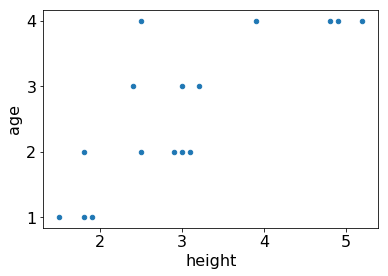

In [56]:
# TODO: add line of best fit
# TODO: add title, units
trees.plot.scatter(x="height", y="age")

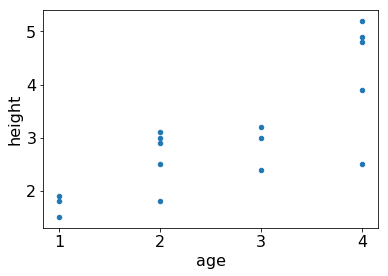

In [57]:
trees.plot.scatter(x="age", y="height")

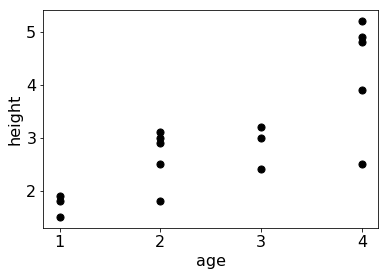

In [58]:
trees.plot.scatter(x="age", y="height", c="black", s=50)

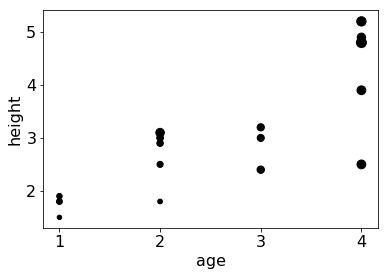

In [62]:
# TODO: use shape (e.g., if there are different tree varieties)
# TODO: use lines (e.g., if multiple points represent same tree)
trees.plot.scatter(x="age", y="height",
                   c="black", s=trees["diameter"]*25)

In [63]:
# EXAMPLE: iris plot

In [73]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cols = ["sep-len", "sep-wid", "pet-len", "pet-wid", "class"]
df = pd.read_csv(url, names=cols)
df.head()

,sep-len,sep-wid,pet-len,pet-wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
df["class"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

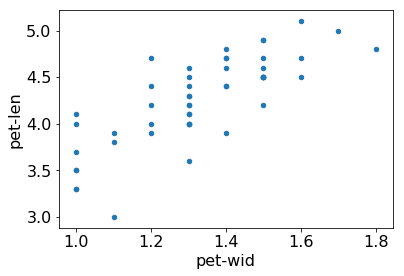

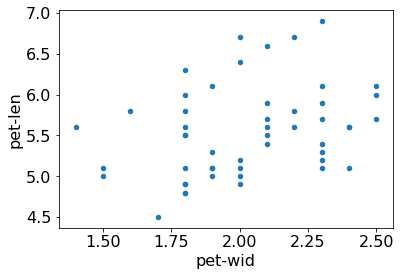

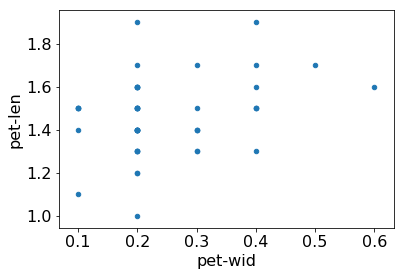

In [77]:
iris = df[df["class"] == "Iris-versicolor"]
iris.plot.scatter(x="pet-wid", y="pet-len")
iris = df[df["class"] == "Iris-virginica"]
iris.plot.scatter(x="pet-wid", y="pet-len")
iris = df[df["class"] == "Iris-setosa"]
iris.plot.scatter(x="pet-wid", y="pet-len")

In [ ]:
df.plot.barh(xlim=(0,100))